<a href="https://colab.research.google.com/github/m0hit-kumar/RASA/blob/main/CollabNotebook/TASC_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!unzip Corrected_data.zip


Archive:  Corrected_data.zip
   creating: Corrected_data/
  inflating: Corrected_data/BombBlast(categorised).json  
  inflating: Corrected_data/Earthquake(categorised).json  
  inflating: Corrected_data/flood(categorised).json  
  inflating: Corrected_data/tornado(categorised).json  
  inflating: Corrected_data/tsnuami (categorised).json  
  inflating: Corrected_data/Volcano(categorised).json  
  inflating: Corrected_data/war(categorised).json  


In [5]:
import json
import os

all_data = []
for filename in os.listdir('Corrected_data/'):
    if filename.endswith(".json"):
        file_path = os.path.join('Corrected_data/', filename)
        with open(file_path, 'r') as file:
            data = json.load(file)
            all_data.extend(data)

with open("Data.json", 'w') as outfile:
    json.dump(all_data, outfile, indent=4)

All JSON files have been combined into 'Data.json'


In [125]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import nltk
nltk.download('stopwords')
import copy
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from imblearn.over_sampling import SMOTE
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import f1_score


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [126]:

data=pd.read_json("Data.json")

In [127]:
data.head()

,text,intent
0,Mr O'Flynn said he was at the finish of the ev...,Miscellaneous
1,"""While I know how sore it must be, let none of...",Miscellaneous
2,"Nancy Ward, director of the California Governo...",Miscellaneous
3,Corpses of soldiers lay strewn on the streets ...,Miscellaneous
4,"The forecaster added: ""The next few days will ...",floods


In [128]:
data["intent"].unique()

array(['Miscellaneous', 'floods', 'Miscellenous', 'Miscellaenous',
       'Miscellneous', 'BombBlast', 'Micscellaneous', 'Micsellaneous',
       'War', 'Micellaneous', 'miscellaneous', 'Miscellaeous',
       'Earthquake', nan, 'Volcano', 'Tornado', 'Miscellanous',
       'Miscelleneous'], dtype=object)

In [129]:
# checlking for nan value
data['intent'].fillna('misc', inplace=True)

data.loc[data["intent"].str.startswith("m"),"intent"]="misc"
data.loc[data["intent"].str.startswith("M"),"intent"]="misc"

In [130]:
data["intent"].unique()

array(['misc', 'floods', 'BombBlast', 'War', 'Earthquake', 'Volcano',
       'Tornado'], dtype=object)

In [131]:
x_train, x_test, y_train, y_test = train_test_split(data["text"],data["intent"],test_size=0.2, random_state=42)
len(x_train),len(x_test)

(390, 98)

In [132]:
# Data Preprocessing cleaing of data
tokenizer = nltk.tokenize.RegexpTokenizer(r"\w+")
stop_words = nltk.corpus.stopwords.words("english")
vectorizer = CountVectorizer(tokenizer=tokenizer.tokenize, stop_words=stop_words)

In [133]:
vectorizer.fit(iter(x_train))
Xtr = vectorizer.transform(iter(x_train))
Xte = vectorizer.transform(iter(x_test))

encoder = LabelEncoder()
encoder.fit(y_train)
Ytr = encoder.transform(y_train)
Yte = encoder.transform(y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [134]:
print("Number of features before reduction : ", Xtr.shape[1])
selection = VarianceThreshold(threshold=0.001)
Xtr_whole = copy.deepcopy(Xtr)
Ytr_whole = copy.deepcopy(Ytr)
selection.fit(Xtr)
Xtr = selection.transform(Xtr)
Xte = selection.transform(Xte)
print("Number of features after reduction : ", Xtr.shape[1])

Number of features before reduction :  6646
Number of features after reduction :  6646


In [135]:
def plot_me(Ytr):
  labels = list(set(Ytr))
  counts = []
  for label in labels:
      counts.append(np.count_nonzero(Ytr == label))
  plt.pie(counts, labels=labels, autopct='%1.1f%%')
  plt.show()

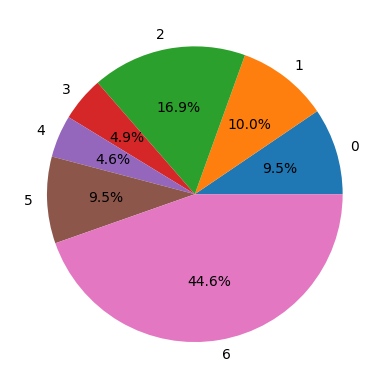

In [136]:
plot_me(Ytr)

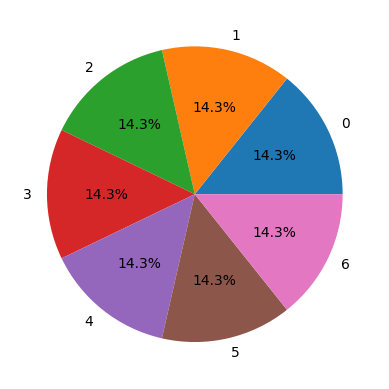

In [137]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
Xtr, Ytr = sm.fit_resample(Xtr, Ytr)
plot_me(Ytr)

In [139]:
# Baseline Model
dc = DummyClassifier(strategy="stratified")
dc.fit(Xtr, Ytr)
pred = dc.predict(Xte)
print(classification_report(Yte, pred, target_names=encoder.classes_))

              precision    recall  f1-score   support

   BombBlast       0.00      0.00      0.00         6
  Earthquake       0.00      0.00      0.00         6
     Tornado       0.20      0.18      0.19        17
     Volcano       0.00      0.00      0.00         1
         War       0.00      0.00      0.00         4
      floods       0.18      0.18      0.18        11
        misc       0.86      0.23      0.36        53

    accuracy                           0.17        98
   macro avg       0.18      0.08      0.10        98
weighted avg       0.52      0.17      0.25        98



In [140]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(Xtr, Ytr)
pred = dt.predict(Xte)
print(classification_report(Yte, pred, target_names=encoder.classes_))

              precision    recall  f1-score   support

   BombBlast       0.23      0.50      0.32         6
  Earthquake       0.31      0.83      0.45         6
     Tornado       0.74      0.82      0.78        17
     Volcano       0.50      1.00      0.67         1
         War       0.00      0.00      0.00         4
      floods       0.20      0.18      0.19        11
        misc       0.64      0.40      0.49        53

    accuracy                           0.47        98
   macro avg       0.37      0.53      0.41        98
weighted avg       0.53      0.47      0.47        98



In [142]:
# Random Forest
rf = RandomForestClassifier(n_estimators=40)
rf.fit(Xtr, Ytr)
pred = rf.predict(Xte)
print(classification_report(Yte, pred, target_names=encoder.classes_))

              precision    recall  f1-score   support

   BombBlast       0.38      0.83      0.53         6
  Earthquake       0.33      0.67      0.44         6
     Tornado       0.75      0.88      0.81        17
     Volcano       0.33      1.00      0.50         1
         War       0.17      0.25      0.20         4
      floods       0.55      1.00      0.71        11
        misc       0.88      0.40      0.55        53

    accuracy                           0.59        98
   macro avg       0.48      0.72      0.53        98
weighted avg       0.72      0.59      0.59        98



In [143]:
# Multinomial Naive Bayesian
nb = MultinomialNB()
nb.fit(Xtr, Ytr)
pred = nb.predict(Xte)
print(classification_report(Yte, pred, target_names=encoder.classes_))

              precision    recall  f1-score   support

   BombBlast       0.67      1.00      0.80         6
  Earthquake       0.75      0.50      0.60         6
     Tornado       0.77      1.00      0.87        17
     Volcano       0.00      0.00      0.00         1
         War       0.50      0.25      0.33         4
      floods       0.64      0.64      0.64        11
        misc       0.88      0.81      0.84        53

    accuracy                           0.79        98
   macro avg       0.60      0.60      0.58        98
weighted avg       0.79      0.79      0.78        98



In [144]:
# Support Vector Classification
from sklearn.svm import SVC
svc = SVC()
svc.fit(Xtr, Ytr)
pred = svc.predict(Xte)
print(classification_report(Yte, pred, target_names=encoder.classes_))

              precision    recall  f1-score   support

   BombBlast       0.38      0.50      0.43         6
  Earthquake       0.75      0.50      0.60         6
     Tornado       0.87      0.76      0.81        17
     Volcano       0.00      0.00      0.00         1
         War       0.00      0.00      0.00         4
      floods       0.71      0.45      0.56        11
        misc       0.69      0.83      0.75        53

    accuracy                           0.69        98
   macro avg       0.48      0.44      0.45        98
weighted avg       0.67      0.69      0.67        98



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [145]:
# Multilayered Perceptron
mlp = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(100, 20), random_state=1, max_iter=400)
mlp.fit(Xtr, Ytr)
pred = mlp.predict(Xte)
print(classification_report(Yte, pred, target_names=encoder.classes_))

              precision    recall  f1-score   support

   BombBlast       0.46      1.00      0.63         6
  Earthquake       0.40      0.67      0.50         6
     Tornado       0.84      0.94      0.89        17
     Volcano       0.00      0.00      0.00         1
         War       0.20      0.25      0.22         4
      floods       0.48      0.91      0.62        11
        misc       0.92      0.45      0.61        53

    accuracy                           0.62        98
   macro avg       0.47      0.60      0.50        98
weighted avg       0.76      0.62      0.63        98



              precision    recall  f1-score   support

   BombBlast       0.67      1.00      0.80         6
  Earthquake       0.75      0.50      0.60         6
     Tornado       0.77      1.00      0.87        17
     Volcano       0.00      0.00      0.00         1
         War       0.50      0.25      0.33         4
      floods       0.64      0.64      0.64        11
        misc       0.88      0.81      0.84        53

    accuracy                           0.79        98
   macro avg       0.60      0.60      0.58        98
weighted avg       0.79      0.79      0.78        98



<Axes: >

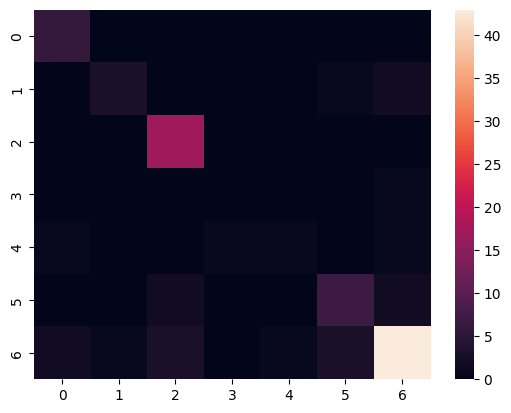

In [146]:
# Multinomial Naive Bayesian
pred = nb.predict(Xte)
print(classification_report(Yte, pred, target_names=encoder.classes_))
sns.heatmap(confusion_matrix(Yte, pred))